# A/B-тест и приоритизация гипотез

# Описание данных
## /datasets/hypothesis.csv:
- Hypothesis - краткое описание гипотезы;
- Reach - охват пользователей по 10-балльной шкале;
- Impact - влияние на пользователей по 10-балльной шкале;
- Confidence - уверенность в гипотезе по 10-балльной шкале;
- Efforts - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
## /datasets/orders.csv:
- transactionId - идентификатор заказа;
- visitorId - идентификатор пользователя, совершившего заказ;
- date - дата, когда был совершён заказ;
- revenue - выручка заказа;
- group - группа A/B-теста, в которую попал заказ.
## /datasets/visitors.csv:
- date - дата;
- group - группа A/B-теста;
- visitors - количество пользователей в указанную дату в указанной группе A/B-теста.

# Цель работы
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

# План
- Шаг 1. Загрузка данных
- Шаг 2. Предобработка данных
- Шаг 3. Приоритизация гипотез
- Шаг 4. Анализ A/B-теста

# Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import datetime as dt

In [2]:
# Загружаем данные
hypothesis = pd.read_csv("/datasets/hypothesis.csv")
orders = pd.read_csv("/datasets/orders.csv")
visitors = pd.read_csv("/datasets/visitors.csv")

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


# Вывод:
Мы выгрузили необходимые библиотеки и загрузили датафреймы. Столбы в датафрейме hypothesis нужно привести к нижнему регистру. Также столбцы с датами нужно привести к типу datetime.

# Шаг 2. Предобработка данных

In [9]:
hypothesis.duplicated().sum()

0

In [10]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [11]:
visitors.duplicated().sum()

0

In [12]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [13]:
orders.duplicated().sum()

0

In [14]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
# Приводим названия столбцов датафрейма к строчным буквам
hypothesis.columns = hypothesis.columns.str.lower()

In [16]:
# Корректируем тип данных
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

# Вывод:
Привели столбцы к правильным видам и типам данных. Проверили на явные дубликаты и пропуски в данных.

# Шаг 3. Приоритизация гипотез

In [17]:
# Выполним расчет ICE и отобразим датафрейм в порядке убывания оценки
hypothesis['ice'] = (round(hypothesis['impact'] * hypothesis['confidence'] / 
                                 hypothesis['efforts'], 1))
pd.options.display.max_colwidth = 150
hypothesis.sort_values(by = 'ice', ascending = False).head(10)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Топ 3 наиболее перспективных гипотез по ICE: запустить акцию, дающую скидку на товар в день рождения, добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

In [18]:
# Выполним расчет RICE и отобразим датафрейм в порядке убывания оценки
hypothesis['rice'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / 
                                hypothesis['efforts'], 1)
pd.options.display.max_colwidth = 150
hypothesis.sort_values(by = 'rice', ascending = False).head(10)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Топ 3 наиболее перспективных гипотез по RICE: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,  добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

# Вывод:
При использовании разных фреймворков видим разницу в приоритизации гипотез. Изменение приоритета произошло из-за добавления в оценку параметра, который оценивает количество затронутых изменением пользователей. Если рассмотреть гипотезу с акцией на день рождения, то влияние на пользователей действительно очень малое и локальное, что не дает высокого приоритета данной гипотезе при оценке RICE. Наибольший интерес вызывают гипотезы под номерами 7, 0 и 6 - они на высоких позициях в оценке RICE, а также характеризуются довольно высоким баллом при расчете ICE. Эти гипотезы входят в топ 4 в обоих случаях.

# Шаг 4. Анализ A/B-теста

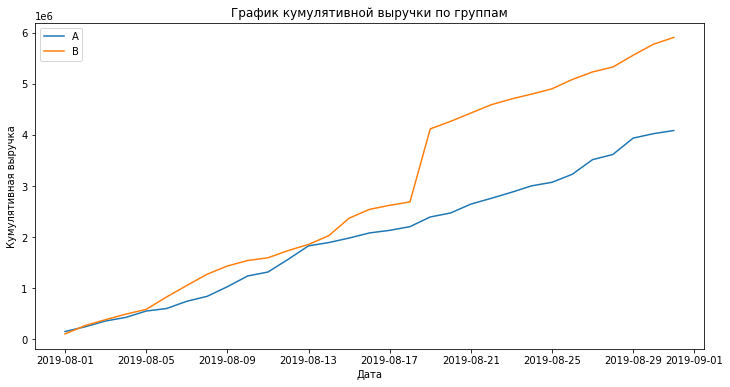

In [19]:
# Построим график кумулятивной выручки по группам

# Создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date', 'group']].drop_duplicates()

# Соберём агрегированные кумулятивные по дням данные о заказах

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам  названия

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
plt.legend()
plt.title("График кумулятивной выручки по группам")
plt.ylabel("Кумулятивная выручка")
plt.xlabel("Дата")
plt.show()

Выручка, полученная от пользователей из группы B больше, но на графики виден явный всплеск с 18 на 19 августа. Он создал большой отрыв по выручке от группы A, но это, скорее, шум, а не эффект от A/B-теста.

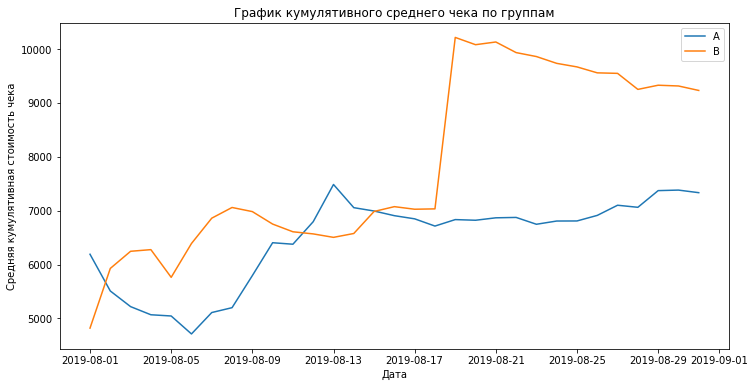

In [20]:
#Построим график кумулятивного среднего чека по группам
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'],cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')
plt.legend()
plt.title("График кумулятивного среднего чека по группам")
plt.ylabel("Средняя кумулятивная стоимость чека")
plt.xlabel("Дата")
plt.show()

Имеется резкий рост в группе В, необходимо посмотреть данные на предмет выбросов (большие заказы).

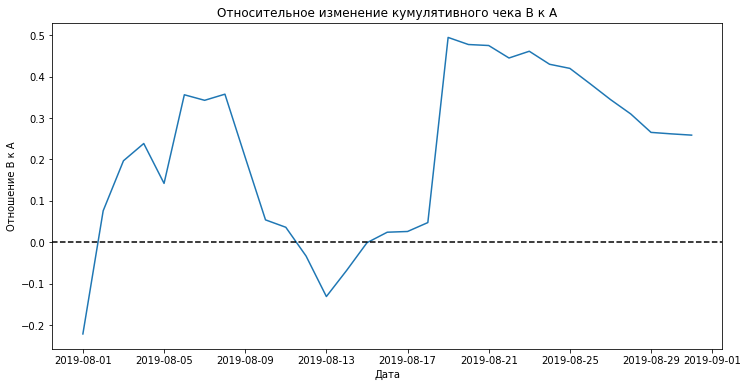

In [21]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A
mergedCumulativeRevenue = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительное изменение кумулятивного чека В к А")
plt.ylabel("Отношение В к А")
plt.xlabel("Дата")
plt.show()

График довольно сильно скачет в обе стороны и только после 18 августа видна какая-то тенденция к стабилизации, но уверенно говорить, что график стабилизировался - нельзя.

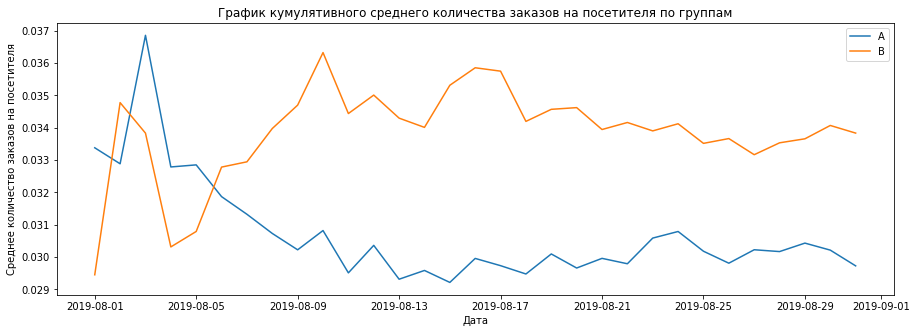

In [22]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим график
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.ylabel("Среднее количество заказов на посетителя")
plt.xlabel("Дата")
plt.show()

Среднее количество заказов группы В преобладает, несмотря на первичные коленбания.

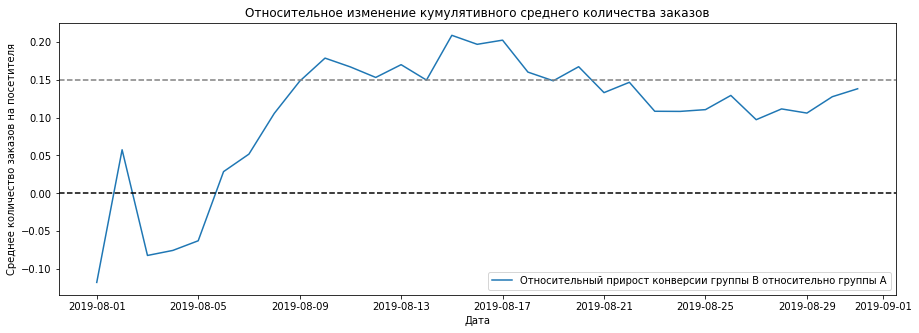

In [23]:
#Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего количества заказов")
plt.ylabel("Среднее количество заказов на посетителя")
plt.xlabel("Дата")
plt.show()

В начале наблюдений график колеблется, а после резкого скачка вверх в середине теста постепенно снижается. Тем не менее, группа B показывает стабильно более высокий результат относительно группы A по среднему количеству заказов.

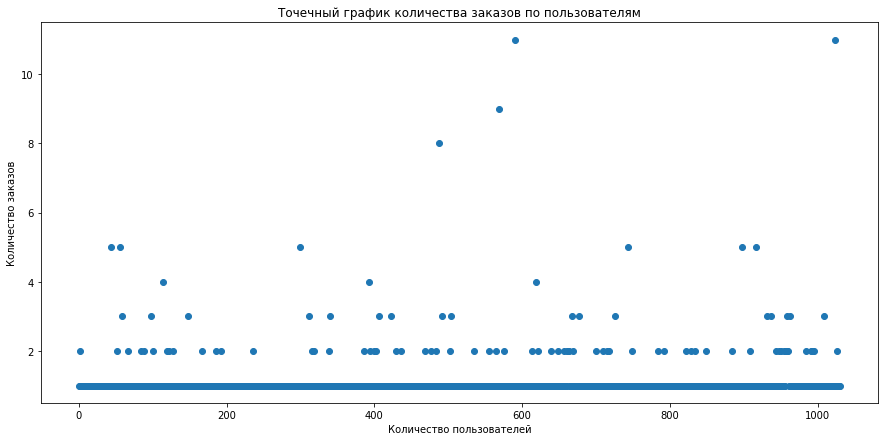

In [24]:
#Постройте точечный график количества заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel("Количество заказов")
plt.xlabel("Количество пользователей")
plt.show()

Как видно, наиболее типичной является ситуация, когда 1 пользователь делает 1 заказ, реже - 2 или 3, для 4 и более заказов точек совсем мало. Однако, чтобы понять, какие значения являются аномальными, необходимо определить 95 и 99 перцентили.

In [25]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Если в качестве границы для определения аномальных пользователей мы возьмём 95-й перцентиль, то потеряем много данных. Поэтому будем определять аномальных пользователей с наибольшим числом заказов по 99-му перцентилю.

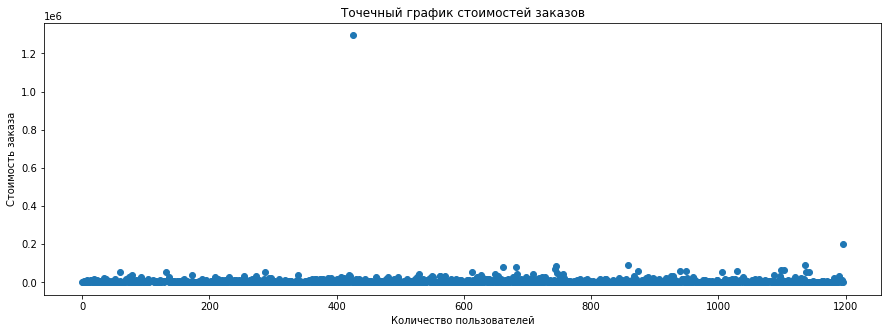

In [26]:
#Постройте точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов")
plt.ylabel("Стоимость заказа")
plt.xlabel("Количество пользователей")
plt.show()

Подавляющее масса заказов по стоимости лежит в одной плоскости, но есть несколько значений, которые очень сильно выбиваются. Это точно выбросы, скорее всего - ошибки в данных.

In [27]:
#Посчитаем 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Также лучше определять границу по 99 перцентилю.

In [28]:
# количество посетителей по дням в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество посетителей с накоплением по дням в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество посетителей по дням в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# количество посетителей с накоплением по дням в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# количество заказов и выручка по дням в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# количество заказов и выручка по дням с накоплением в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# количество заказов и выручка по дням в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# количество заказов и выручка по дням с накоплением в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# финальный датасет
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
# переменные ordersByUsersA и ordersByUsersB
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
# переменные sampleA и sampleB
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

- H_0: Cреднее количество заказов на посетителя в группе A статистически значимо не отличается от среднего количества заказов на посетителя в группе B
- H_1: Cреднее количество заказов на посетителя в группе A статистически значимо отличается от среднего количества заказов на посетителя в группе B
- alpha = 0.05
- Лучше использовать непараметрический тест Уилкоксона-Манна-Уитни, так как, в данных есть большие (по сравнению с нормальным распределением) выбросы, и из-за них алгебраические метрики работают плохо.

In [29]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
print('p_value -',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Отличия между группами -',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p_value - 0.01679
Отличия между группами - 0.138


Вероятность получить наблюдемый результат при условии, что H_0 верна, составляет менее 5%. На данном уровне значимости мы отвергаем H_0 в пользу H_1. Cреднее количество заказов на посетителя в группе A статистически значимо отличается от среднего количества заказов на посетителя в группе B. Относительный прирост группы B около 14 %.

- H_0: Cредний чек заказа в группе A статистически значимо не отличается от среднего чека заказа в группе B
- H_1: Cредний чек заказа в группе A статистически значимо отличается от среднего чека заказа в группе B
- alpha = 0.05

In [30]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
print('p_value -','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека -','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value - 0.729
Относительное различие среднего чека - 0.259


Вероятность получить наблюдемый результат при условии, что H_0 верна, составляет более 7%. На данном уровне значимости нет оснований отвергать H_0. Cредний чек заказа в группе A статистически значимо не отличается от среднего чека заказа в группе B.
Относительный прирост группы B около 26 %.

In [31]:
#Очищаем данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(' "Аномальных" пользователей убрано -',abnormalUsers.shape[0]) 

 "Аномальных" пользователей убрано - 15


In [32]:
# Проверяем гипотезу
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

- H_0: Cреднее количество заказов на посетителя в группе A статистически значимо не отличается от среднего количества заказов на посетителя в группе B
- H_1: Cреднее количество заказов на посетителя в группе A статистически значимо отличается от среднего количества заказов на посетителя в группе B
- alpha = 0.05

In [33]:
print('p_value -','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отличия между группами -','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p_value - 0.014
Отличия между группами - 0.153


Удаление аномальных пользователей не повлияло на результат. Cреднее количество заказов на посетителя в группе A статистически значимо отличается от среднего количества заказов на посетителя в группе B. Мы отвергаем нулевую гипотезу, так как alpha < p_value.

- H_0: Cредний чек заказа в группе A статистически значимо не отличается от среднего чека заказа в группе B
- H_1: Cредний чек заказа в группе A статистически значимо отличается от среднего чека заказа в группе B
- alpha = 0.05

In [34]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
print('p_value -',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

p_value - 0.851


In [35]:
print('Относительное различие среднего чека -',
    '{0:.3f}'.format(
        
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean() /
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean()-1
    )
)

Относительное различие среднего чека - 0.006


Удаление аномальных пользователей не повлияло на результат. Cредний чек заказа в группе A статистически значимо не отличается от среднего чека заказа в группе B. Мы не отвергаем нулевую гипотезу, так как alpha > p_value.

# Решение по результатам теста

- Существует статистически значимое различие между группами А и В как по "сырым" данным, так и по очищенным.
- Статистически значимых различий в размере среднего чека не обнаружено ни в "сырых" данных, ни после фильтрации.
- График кумулятивной конверсии показывает, что конверсия группы B и прирост конверсии группы В по отношению к А что по "сырым", что по очищенным данным показывают, что конверсия группы В выше.

На основании этих выводов можно признать тест успешным и остановить его, зафиксировав победу группы В.

# Общий вывод:
- Мы выгрузили необходимые библиотеки и загрузили датафреймы. Столбы в датафрейме hypothesis привели к нижнему регистру. Также столбцы с датами привели к типу datetime. Проверили на явные дубликаты и пропуски в данных.
- При использовании разных фреймворков мы увидили разницу в приоритизации гипотез. Изменение приоритета произошло из-за добавления в оценку параметра, который оценивает количество затронутых изменением пользователей. Если рассмотреть гипотезу с акцией на день рождения, то влияние на пользователей действительно очень малое и локальное, что не дает высокого приоритета данной гипотезе при оценке RICE. Наибольший интерес вызывают гипотезы под номерами 7, 0 и 6 - они на высоких позициях в оценке RICE, а также характеризуются довольно высоким баллом при расчете ICE. Эти гипотезы входят в топ 4 в обоих случаях.
- Существует статистически значимое различие между группами А и В как по "сырым" данным, так и по очищенным.
- Статистически значимых различий в размере среднего чека не обнаружено ни в "сырых" данных, ни после фильтрации.
- График кумулятивной конверсии показывает, что конверсия группы B и прирост конверсии группы В по отношению к А что по "сырым", что по очищенным данным показывают, что конверсия группы В выше.

На основании данных мы признали тест успешным и остановили его, зафиксировав победу группы В.